In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
df = pd.read_csv("../Data/raw/data.csv")

In [3]:

# 1. Overview of the Data
print("1. DATA OVERVIEW")
print("Rows, columns:", df.shape)
print(df.dtypes)
print()


1. DATA OVERVIEW
Rows, columns: (95662, 16)
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object



In [4]:

# 2. Summary Statistics
print("2. SUMMARY STATISTICS")
print(df.describe().T)
print()


2. SUMMARY STATISTICS
                   count         mean            std        min    25%  \
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  
CountryCode       256.0   256.0      256.0  
Amount           1000.0  2800.0  9880000.0  
Value            1000.0  5000.0  9880000.0  
PricingStrategy     2.0     2.0        4.0  
FraudResult         0.0     0.0        1.0  



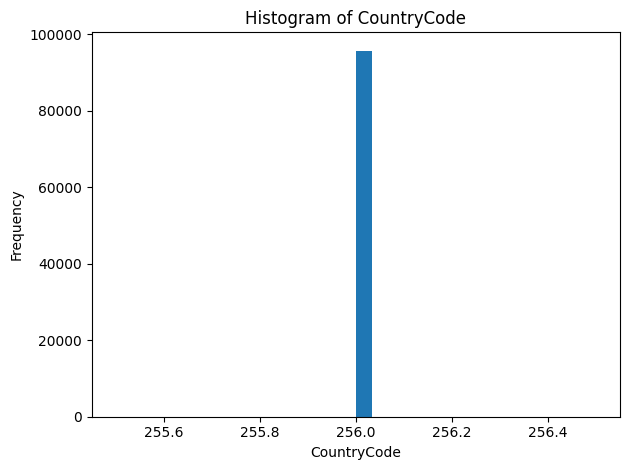

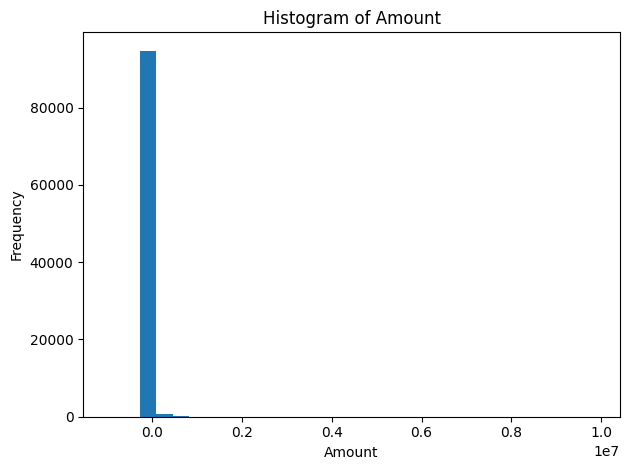

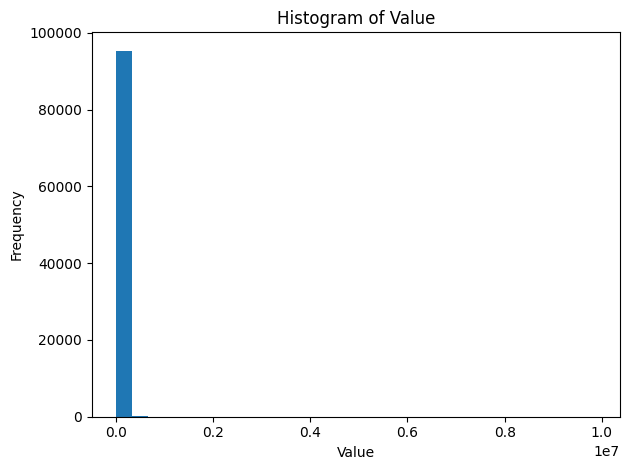

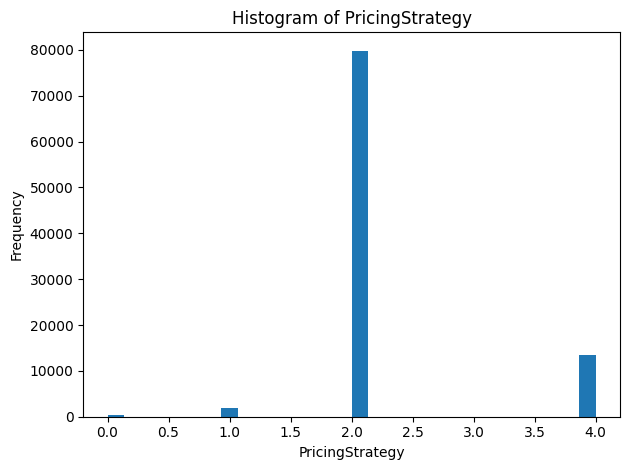

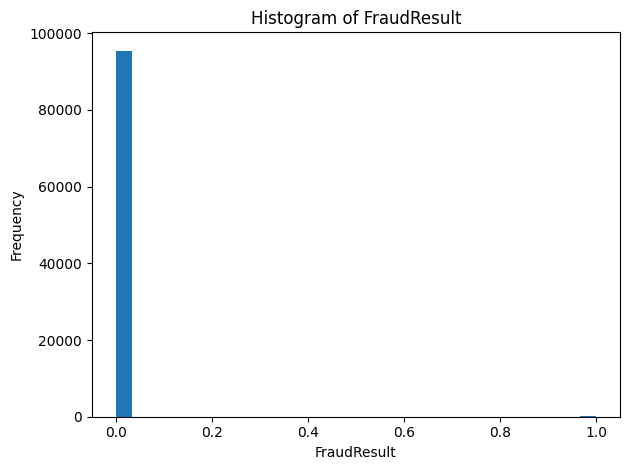

In [5]:

# 3. Distribution of Numerical Features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()


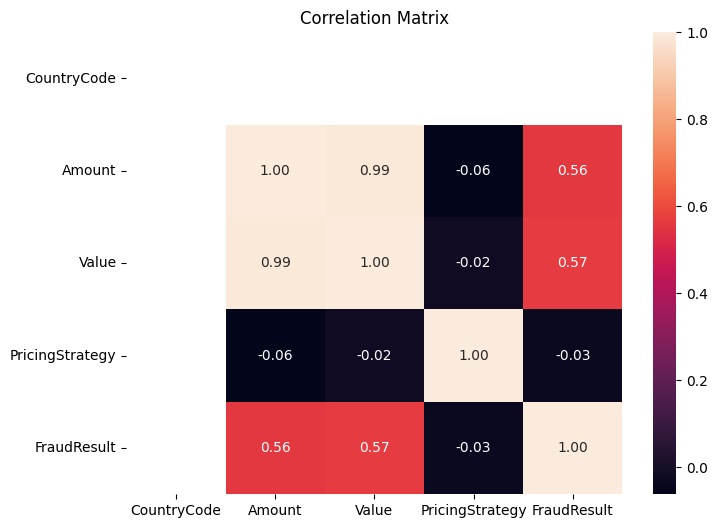

In [13]:
# 5. Correlation Analysis with Seaborn
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:

# 6. Identifying Missing Values
print("6. MISSING VALUES PER COLUMN")
print(df.isna().sum())
print()


6. MISSING VALUES PER COLUMN
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64



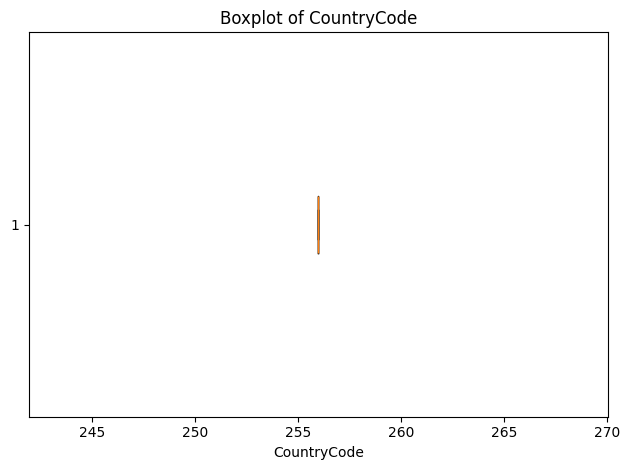

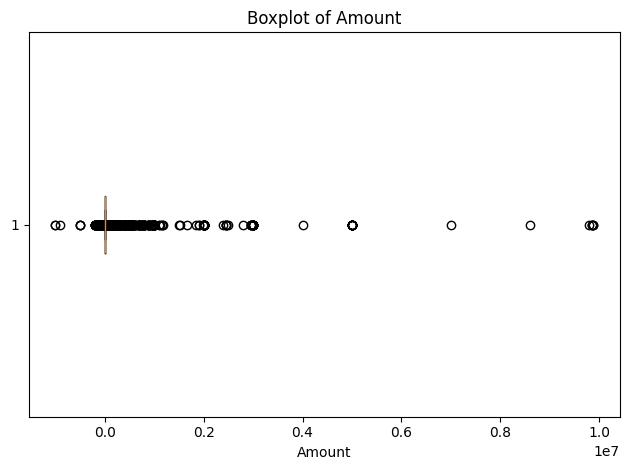

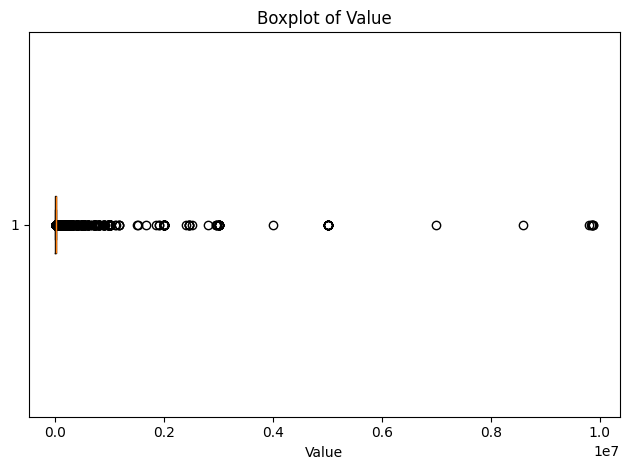

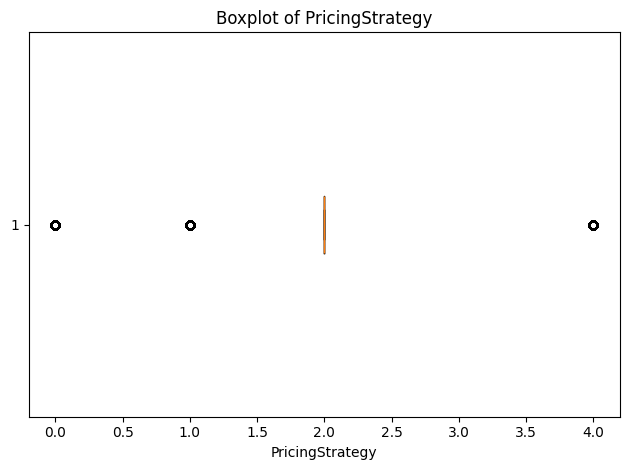

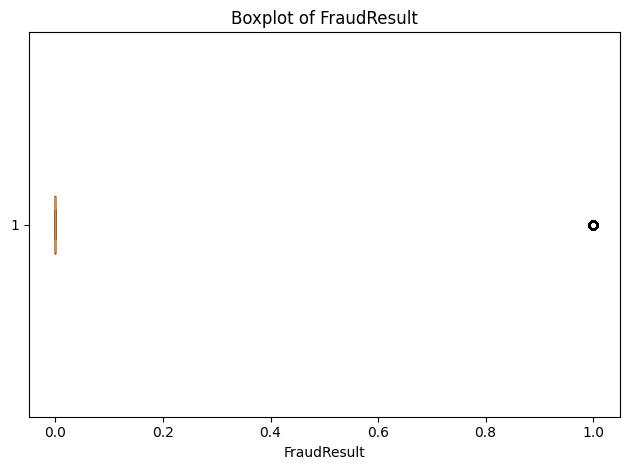

In [8]:

# 7. Outlier Detection (boxplots)
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()
